# <center> DL5 : Functional API of Keras <center>

---



In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

#I- Simple example with MNIST

Load the data and preprocess it 

In [ ]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels)=mnist.load_data()
train = train_images.reshape(60000, 28*28)
test = test_images.reshape(10000, 28*28)
x_train = train.astype("float32") / 255
x_test = test.astype("float32") / 255
y_train = train_labels
y_test = test_labels

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
y_train.shape

(60000,)

Define the model

In [ ]:
inputs = keras.Input(shape=(784,))
dense = layers.Dense(64, activation='relu')(inputs)

dense2 = layers.Dense(64, activation='relu')(dense)

dense3 = layers.Dense(10, activation='softmax')(dense2)


In [ ]:
model = keras.Model(inputs=inputs, outputs=dense3)

Plot the model architecture

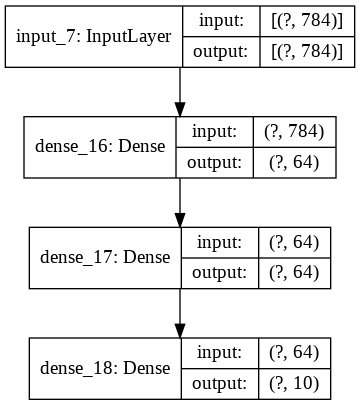

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

compile, train and evaluate the model

when using sparse_categorical_crossentropy we don't need to one hot encode the labels

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
 optimizer=keras.optimizers.RMSprop(),
 metrics=['accuracy'])
history = model.fit(x_train, y_train,batch_size=64,epochs=10,validation_split=0.2)
test_scores = model.evaluate(x_test, y_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test accuracy:', test_scores[1])

Epoch 1/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0114 - accuracy: 0.9965 - val_loss: 0.1562 - val_accuracy: 0.9726
Epoch 2/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0089 - accuracy: 0.9972 - val_loss: 0.1687 - val_accuracy: 0.9735
Epoch 3/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0091 - accuracy: 0.9971 - val_loss: 0.1768 - val_accuracy: 0.9729
Epoch 4/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0073 - accuracy: 0.9977 - val_loss: 0.1696 - val_accuracy: 0.9743
Epoch 5/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.1869 - val_accuracy: 0.9734
Epoch 6/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0066 - accuracy: 0.9977 - val_loss: 0.2014 - val_accuracy: 0.9706
Epoch 7/10
750/750 [==============================] - 2s 2ms/step - loss: 0.0054 - accuracy: 0.9982 - val_loss: 0.1830 - val_accuracy: 0.9748
Epoch 

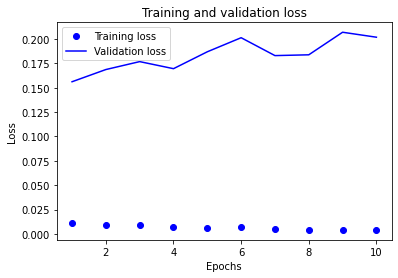

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# II- Autoencoders

Create an autoencoder Convnet in order to learn to reproduce mnist images

1- Define the encoder 

In [ ]:
encoder_input = keras.Input(shape=(28, 28, 1), name='original_img')
x = layers.Conv2D(16, 3, activation='relu')(encoder_input)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.MaxPooling2D(3)(x)
x = layers.Conv2D(32, 3, activation='relu')(x)
x = layers.Conv2D(16, 3, activation='relu')(x)
encoder_output = layers.GlobalMaxPooling2D()(x)
encoder = keras.Model(encoder_input, encoder_output, name='encoder')
encoder.summary()

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
original_img (InputLayer)    [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 6, 6, 32)          9248      
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 16)          4624      
_________________________________________________________________
global_max_pooling2d_1 (Glob (None, 16)                0   

2- Define the decoder :

In [ ]:
decoder_input = keras.Input(shape=(16,), name='encoded_img')
x = layers.Reshape((4, 4, 1))(decoder_input)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
x = layers.Conv2DTranspose(32, 3, activation='relu')(x)
x = layers.UpSampling2D(3)(x)
x = layers.Conv2DTranspose(16, 3, activation='relu')(x)
decoder_output = layers.Conv2DTranspose(1, 3, activation='relu')(x)
decoder = keras.Model(decoder_input, decoder_output, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoded_img (InputLayer)     [(None, 16)]              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 4, 4, 1)           0         
_________________________________________________________________
conv2d_transpose_4 (Conv2DTr (None, 6, 6, 16)          160       
_________________________________________________________________
conv2d_transpose_5 (Conv2DTr (None, 8, 8, 32)          4640      
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_transpose_6 (Conv2DTr (None, 26, 26, 16)        4624      
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 28, 28, 1)         145 

3- Define the whole autoencoder model

In [ ]:
autoencoder_input = keras.Input(shape=(28, 28, 1), name='img')
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 16)                18672     
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         9569      
Total params: 28,241
Trainable params: 28,241
Non-trainable params: 0
_________________________________________________________________


reshape the images 

In [ ]:
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))

train the autoencoder

In [ ]:

autoencoder.compile(loss='mean_squared_error',
 optimizer=keras.optimizers.RMSprop(),
 metrics=['mae'])
history = autoencoder.fit(x_train, x_train,batch_size=64,epochs=10,validation_split=0.2)
test_scores = autoencoder.evaluate(x_test, x_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test mae:', test_scores[1])

Epoch 1/10
750/750 [==============================] - 4s 6ms/step - loss: 0.0253 - mae: 0.0640 - val_loss: 0.0263 - val_mae: 0.0628
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0248 - mae: 0.0630 - val_loss: 0.0242 - val_mae: 0.0632
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0243 - mae: 0.0621 - val_loss: 0.0258 - val_mae: 0.0663
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0240 - mae: 0.0615 - val_loss: 0.0245 - val_mae: 0.0639
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0237 - mae: 0.0608 - val_loss: 0.0227 - val_mae: 0.0596
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0234 - mae: 0.0603 - val_loss: 0.0240 - val_mae: 0.0610
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0231 - mae: 0.0597 - val_loss: 0.0240 - val_mae: 0.0593
Epoch 8/10
750/750 [==============================] - 4s 5ms/step - loss: 0.

Show some predictions on the test set

In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
prediction = autoencoder.predict(x_test)

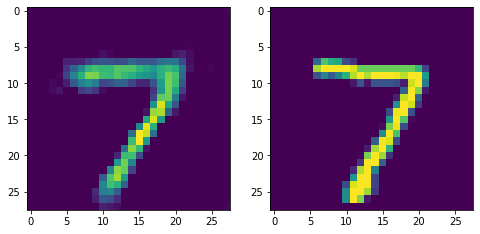

In [ ]:


fig=plt.figure(figsize=(8, 8))
fig.add_subplot(1,2,1)
plt.imshow(prediction[0,:,:,:].reshape(28,28))
fig.add_subplot(1,2,2)
plt.imshow(x_test[0,:,:,:].reshape(28,28))


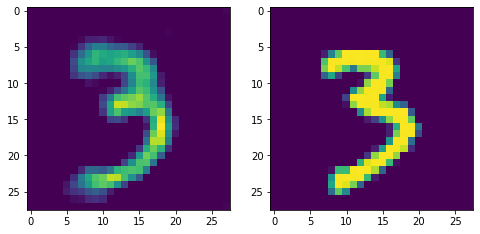

In [ ]:

fig=plt.figure(figsize=(8, 8))
fig.add_subplot(1,2,1)
plt.imshow(prediction[30,:,:,:].reshape(28,28))
fig.add_subplot(1,2,2)
plt.imshow(x_test[30,:,:,:].reshape(28,28))

Test with fashion_mnist

In [ ]:
 (train_images, train_labels),(test_images, test_labels) = keras.datasets.fashion_mnist.load_data()
train = train_images.reshape(60000, 28*28)
test = test_images.reshape(10000, 28*28)
x_train = train.astype("float32") / 255
x_test = test.astype("float32") / 255
x_train = x_train.reshape((x_train.shape[0],28,28,1))
x_test = x_test.reshape((x_test.shape[0],28,28,1))

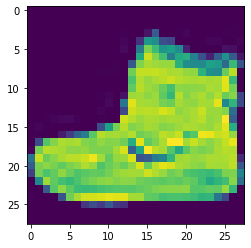

In [ ]:
plt.imshow(train_images[0,:,:])

Define the same model and train it on the new datasett

In [ ]:
autoencoder_input = keras.Input(shape=(28, 28, 1), name='img')
encoded_img = encoder(autoencoder_input)
decoded_img = decoder(encoded_img)
autoencoder = keras.Model(autoencoder_input, decoded_img, name='autoencoder')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
img (InputLayer)             [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 16)                18672     
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         9569      
Total params: 28,241
Trainable params: 28,241
Non-trainable params: 0
_________________________________________________________________


In [ ]:

autoencoder.compile(loss='mean_squared_error',
 optimizer=keras.optimizers.RMSprop(),
 metrics=['mae'])
history = autoencoder.fit(x_train, x_train,batch_size=64,epochs=10,validation_split=0.2)
test_scores = autoencoder.evaluate(x_test, x_test, verbose=2)
print('Test loss:', test_scores[0])
print('Test mae:', test_scores[1])

Epoch 1/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0368 - mae: 0.1138 - val_loss: 0.0307 - val_mae: 0.0995
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0298 - mae: 0.0989 - val_loss: 0.0316 - val_mae: 0.1009
Epoch 3/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0282 - mae: 0.0949 - val_loss: 0.0276 - val_mae: 0.0937
Epoch 4/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0272 - mae: 0.0924 - val_loss: 0.0263 - val_mae: 0.0901
Epoch 5/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0264 - mae: 0.0906 - val_loss: 0.0255 - val_mae: 0.0880
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0258 - mae: 0.0892 - val_loss: 0.0283 - val_mae: 0.0972
Epoch 7/10
750/750 [==============================] - 4s 5ms/step - loss: 0.0253 - mae: 0.0880 - val_loss: 0.0274 - val_mae: 0.0948
Epoch 8/10
750/750 [==============================] - 4s 5ms/step - loss: 0.

In [ ]:
prediction = autoencoder.predict(x_test)

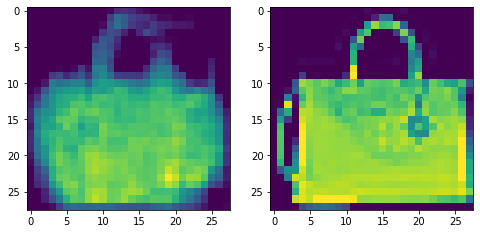

In [ ]:

fig=plt.figure(figsize=(8, 8))
fig.add_subplot(1,2,1)
plt.imshow(prediction[30,:,:,:].reshape(28,28))
fig.add_subplot(1,2,2)
plt.imshow(x_test[30,:,:,:].reshape(28,28))

## III- Model with multiple inputs and outputs

### Create dummy data

In [ ]:
import numpy as np
num_tags = 12 # Number of unique issue tags
num_words = 10000 # Size of vocabulary obtained when preprocessing text data
num_departments = 4 # Number of departments for predictions

# Dummy input data
 
title_data = np.random.randint(num_words, size=(1280, 10))
body_data = np.random.randint(num_words, size=(1280, 100))
tags_data = np.random.randint(2, size=(1280, num_tags)).astype('float32')
# Dummy target data
priority_targets = np.random.random(size=(1280, 1))
dept_targets = np.random.randint(2, size=(1280, num_departments))

### Build the model

In [ ]:
title_input = keras.Input(shape=(None,), name='title') # Variable-length sequence of ints
body_input = keras.Input(shape=(None,), name='body') # Variable-length sequence of ints
tags_input = keras.Input(shape=(num_tags,), name='tags') # Binary vectors of size `num_tags`


In [ ]:
# Embed each word in the title into a 64-dimensional vector
title_features = layers.Embedding(num_words, 64)(title_input)
# Embed each word in the text into a 64-dimensional vector
body_features = layers.Embedding(num_words, 64)(body_input)

In [ ]:
# Reduce sequence of embedded words in the title into a single 128-dimensional vector
title_features = layers.LSTM(128)(title_features)
# Reduce sequence of embedded words in the body into a single 32-dimensional vector
body_features = layers.LSTM(32)(body_features)
# Merge all available features into a single large vector via concatenation
x = layers.concatenate([title_features, body_features, tags_input])
# Stick a logistic regression for priority prediction on top of the features
priority_pred = layers.Dense(1, activation='sigmoid', name='priority')(x)
# Stick a department classifier on top of the features
department_pred = layers.Dense(num_departments, activation='softmax', name='department')(x)
# Instantiate an end-to-end model predicting both priority and department
model = keras.Model(inputs=[title_input, body_input, tags_input],
 outputs=[priority_pred, department_pred])

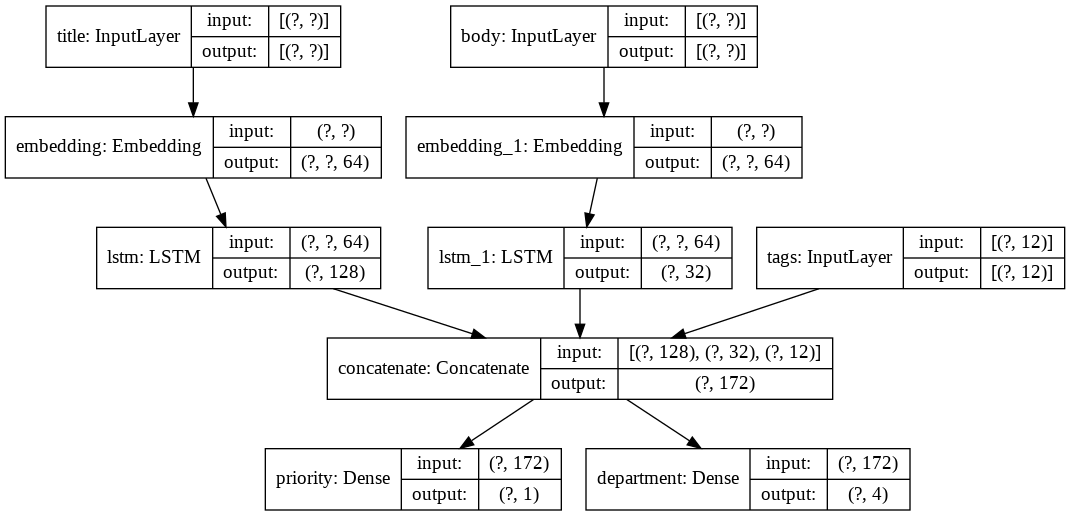

In [ ]:
keras.utils.plot_model(model, 'multi_input_and_output_model.png', show_shapes=True)


In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
 loss={'priority': 'binary_crossentropy',
 'department': 'categorical_crossentropy'},
 loss_weights=[1., 0.2])

In [ ]:
model.fit({'title': title_data, 'body': body_data, 'tags': tags_data},
 {'priority': priority_targets, 'department': dept_targets},
 epochs=2,
 batch_size=32)

Epoch 1/2
40/40 [==============================] - 1s 15ms/step - loss: 1.3452 - priority_loss: 0.7018 - department_loss: 3.2166
Epoch 2/2
40/40 [==============================] - 1s 14ms/step - loss: 1.3492 - priority_loss: 0.6982 - department_loss: 3.2549


VI- Final model 

1- create dummy data 

In [ ]:
# ### the 6 planes
# import random
# planes = np.array(random.choices([0,1], k=1000*19*19*6)).reshape((1000,19,19,6))
# ### the policy
# policy = np.zeros((1000,361))
# for i in range(policy.shape[0]):
#   index = np.random.randint(361)
#   policy[i,index] = 1
# #### 1 o 0 output
# output = np.array(random.choices([0,1],k=1000)).reshape((1000,))

In [ ]:
N = 100000
planes = 6
moves = 361
input_data = np.random.randint(2, size=(N, 19, 19, planes))
input_data = input_data.astype ('float32')

policy = np.random.randint(moves, size=(N,))
policy = keras.utils.to_categorical (policy)

value = np.random.randint(2, size=(N,))
value = value.astype ('float32')

In [ ]:
input_data.shape, policy.shape, value.shape

((100000, 19, 19, 6), (100000, 361), (100000,))

2- Define the model

In [ ]:
input = keras.Input(shape=(19, 19, planes), name='board')
x = layers.Conv2D(32, 3, activation='relu', padding='same')(input)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
policy_head = layers.Conv2D(1, 3, activation='relu', padding='same')(x)
policy_head = layers.Flatten()(policy_head)
policy_head = layers.Dense(moves, activation='softmax', name='policy')(policy_head)
value_head = layers.Flatten()(x)
value_head = layers.Dense(1, activation='sigmoid', name='value')(value_head)
 
model = keras.Model(inputs=input, outputs=[policy_head, value_head])
 
model.summary ()


Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
board (InputLayer)              [(None, 19, 19, 6)]  0                                            
__________________________________________________________________________________________________
conv2d_22 (Conv2D)              (None, 19, 19, 32)   1760        board[0][0]                      
__________________________________________________________________________________________________
conv2d_23 (Conv2D)              (None, 19, 19, 32)   9248        conv2d_22[0][0]                  
__________________________________________________________________________________________________
conv2d_24 (Conv2D)              (None, 19, 19, 32)   9248        conv2d_23[0][0]                  
_______________________________________________________________________________________

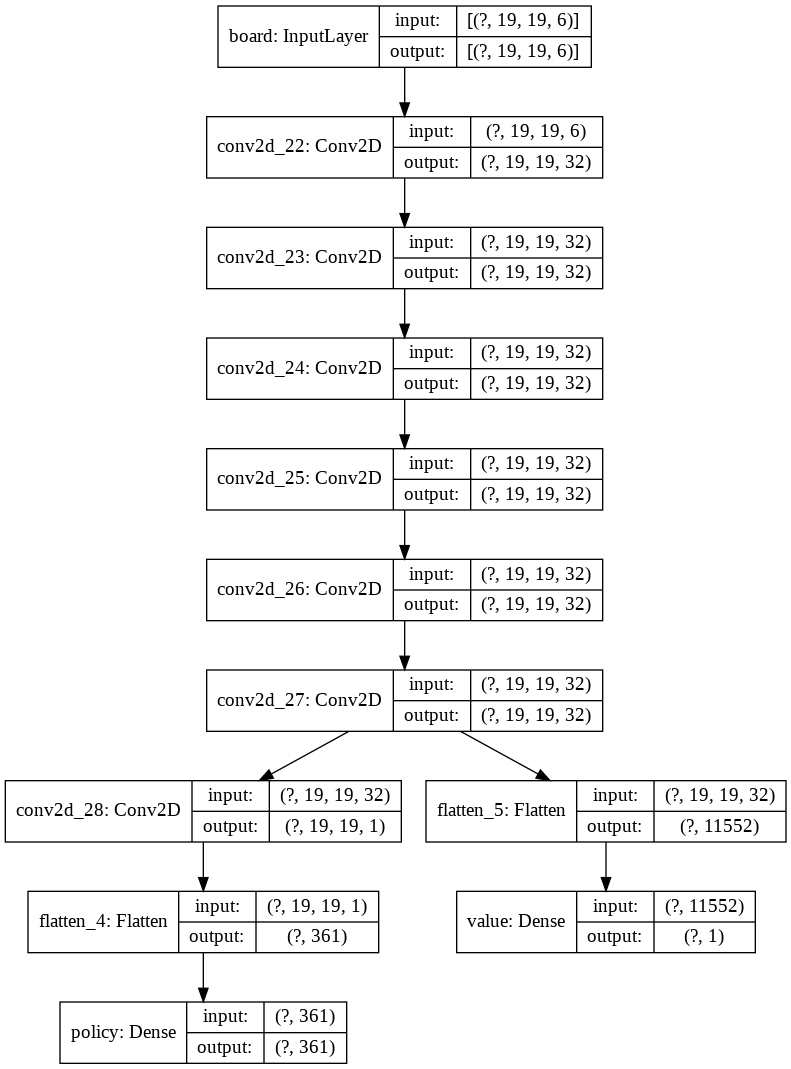

In [ ]:
keras.utils.plot_model(model, show_shapes=True)


In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(1e-3),
 loss={'policy': 'categorical_crossentropy',
 'value': 'mse'},
 loss_weights=[1., 1.])

In [ ]:
model.fit((input_data),
 (policy,value),
 epochs=2,
 batch_size=32, validation_split = 0.2)

Epoch 1/2
2500/2500 [==============================] - 15s 6ms/step - loss: 6.1394 - policy_loss: 5.8894 - value_loss: 0.2500 - val_loss: 6.1400 - val_policy_loss: 5.8901 - val_value_loss: 0.2500
Epoch 2/2
2500/2500 [==============================] - 14s 5ms/step - loss: 6.1394 - policy_loss: 5.8893 - value_loss: 0.2500 - val_loss: 6.1414 - val_policy_loss: 5.8915 - val_value_loss: 0.2500


In [ ]:
model.save ('test.h5')

# <center> RESIDUAL NETWORKS VS CONVNETS

Let's compare a convnet and a resnet on CIFAR10


1- Prepare the data

In [ ]:
import matplotlib.pyplot as plt
from keras import datasets
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
train_images.shape, test_images.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [ ]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
train_labels = keras.utils.to_categorical(train_labels, 10) # 10 classes
test_labels = keras.utils.to_categorical(test_labels, 10)

2- Define and train the convnet : 

In [ ]:
## classification model for cifar10
from tensorflow.keras.layers import Input,Lambda,Flatten,MaxPooling2D,Dropout,Conv2D, Dense
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD
def build_model_base_CNN(input_shape):
  input = Input(shape=input_shape)
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.2))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dropout(0.2))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = SGD(lr=0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
### train a cnn classification model 


convnet = build_model_base_CNN(train_images.shape[1:])
history1 = convnet.fit(train_images, train_labels, epochs=20, batch_size=64,verbose=1,validation_data=(test_images,test_labels))

Epoch 1/20
782/782 [==============================] - 7s 8ms/step - loss: 2.0962 - accuracy: 0.2199 - val_loss: 1.8755 - val_accuracy: 0.3111
Epoch 2/20
782/782 [==============================] - 6s 8ms/step - loss: 1.7499 - accuracy: 0.3536 - val_loss: 1.6288 - val_accuracy: 0.4134
Epoch 3/20
782/782 [==============================] - 6s 8ms/step - loss: 1.5739 - accuracy: 0.4258 - val_loss: 1.4736 - val_accuracy: 0.4676
Epoch 4/20
782/782 [==============================] - 6s 8ms/step - loss: 1.4642 - accuracy: 0.4668 - val_loss: 1.3182 - val_accuracy: 0.5267
Epoch 5/20
782/782 [==============================] - 6s 8ms/step - loss: 1.3740 - accuracy: 0.5004 - val_loss: 1.2440 - val_accuracy: 0.5587
Epoch 6/20
782/782 [==============================] - 6s 8ms/step - loss: 1.3036 - accuracy: 0.5297 - val_loss: 1.2030 - val_accuracy: 0.5689
Epoch 7/20
782/782 [==============================] - 6s 8ms/step - loss: 1.2352 - accuracy: 0.5551 - val_loss: 1.1134 - val_accuracy: 0.6056
Epoch 

3- Define and train the ResNet :

In [ ]:
from tensorflow.keras import layers
input = layers.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, 3, activation='relu', padding='same')(input)
for i in range (5):
    ident = x
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
    x = layers.add([ident,x])
flatten = layers.Flatten()(x)
dense = layers.Dense(10, activation="softmax")(flatten)
resnet = tf.keras.models.Model(inputs=input, outputs=dense)
opt = SGD(lr=0.001, momentum=0.9)
resnet.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history2 = convnet.fit(train_images, train_labels, epochs=20, batch_size=64,verbose=1,validation_data=(test_images,test_labels))

Epoch 1/20
782/782 [==============================] - 7s 8ms/step - loss: 0.7820 - accuracy: 0.7233 - val_loss: 0.7246 - val_accuracy: 0.7458
Epoch 2/20
782/782 [==============================] - 6s 8ms/step - loss: 0.7664 - accuracy: 0.7291 - val_loss: 0.7034 - val_accuracy: 0.7568
Epoch 3/20
782/782 [==============================] - 6s 8ms/step - loss: 0.7527 - accuracy: 0.7351 - val_loss: 0.7229 - val_accuracy: 0.7478
Epoch 4/20
782/782 [==============================] - 6s 8ms/step - loss: 0.7360 - accuracy: 0.7422 - val_loss: 0.7276 - val_accuracy: 0.7444
Epoch 5/20
782/782 [==============================] - 6s 8ms/step - loss: 0.7233 - accuracy: 0.7456 - val_loss: 0.7065 - val_accuracy: 0.7525
Epoch 6/20
782/782 [==============================] - 6s 8ms/step - loss: 0.7126 - accuracy: 0.7493 - val_loss: 0.6781 - val_accuracy: 0.7631
Epoch 7/20
782/782 [==============================] - 6s 8ms/step - loss: 0.6912 - accuracy: 0.7567 - val_loss: 0.6650 - val_accuracy: 0.7701
Epoch 

4- Another CONVNET similar to the Resnet but we remove the add layer

In [ ]:
from tensorflow.keras import layers
input = layers.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, 3, activation='relu', padding='same')(input)
for i in range (5):
    ident = x
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(x)
    # x = layers.add([ident,x])
flatten = layers.Flatten()(x)
dense = layers.Dense(10, activation="softmax")(flatten)
convnet2 = tf.keras.models.Model(inputs=input, outputs=dense)
opt = SGD(lr=0.001, momentum=0.9)
convnet2.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
history3 = convnet2.fit(train_images, train_labels, epochs=20, batch_size=64,verbose=1,validation_data=(test_images,test_labels))

Epoch 1/20
782/782 [==============================] - 15s 20ms/step - loss: 2.1001 - accuracy: 0.2207 - val_loss: 1.8179 - val_accuracy: 0.3494
Epoch 2/20
782/782 [==============================] - 15s 19ms/step - loss: 1.7235 - accuracy: 0.3813 - val_loss: 1.6282 - val_accuracy: 0.4052
Epoch 3/20
782/782 [==============================] - 15s 19ms/step - loss: 1.5418 - accuracy: 0.4445 - val_loss: 1.6576 - val_accuracy: 0.4044
Epoch 4/20
782/782 [==============================] - 15s 19ms/step - loss: 1.4082 - accuracy: 0.4972 - val_loss: 1.3309 - val_accuracy: 0.5204
Epoch 5/20
782/782 [==============================] - 15s 19ms/step - loss: 1.2854 - accuracy: 0.5418 - val_loss: 1.2723 - val_accuracy: 0.5416
Epoch 6/20
782/782 [==============================] - 15s 19ms/step - loss: 1.1879 - accuracy: 0.5796 - val_loss: 1.1625 - val_accuracy: 0.5865
Epoch 7/20
782/782 [==============================] - 15s 19ms/step - loss: 1.1071 - accuracy: 0.6083 - val_loss: 1.1356 - val_accuracy:

5- Compare RESNET WITH CONVNET

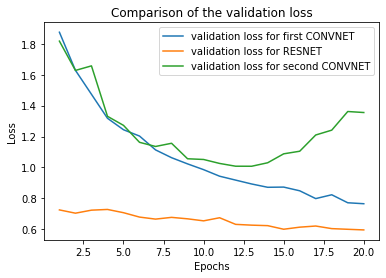

In [ ]:
import matplotlib.pyplot as plt
history_dict1 = history1.history
history_dict2 = history2.history
history_dict3 = history3.history
loss_values1 = history_dict1['val_loss']
loss_values2 = history_dict2['val_loss']
loss_values3 = history_dict3['val_loss']
epochs = range(1, len(loss_values2) + 1)
plt.plot(epochs, loss_values1, label='validation loss for first CONVNET')
plt.plot(epochs, loss_values2, label='validation loss for RESNET')
plt.plot(epochs, loss_values3, label='validation loss for second CONVNET')
plt.title('Comparison of the validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

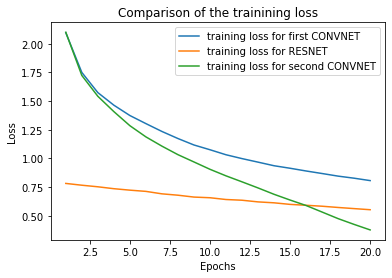

In [ ]:
loss_values1 = history_dict1['loss']

loss_values2 = history_dict2['loss']
loss_values3 = history_dict3['loss']
epochs = range(1, len(loss_values2) + 1)
plt.plot(epochs, loss_values1, label='training loss for first CONVNET')

plt.plot(epochs, loss_values2, label='training loss for RESNET')
plt.plot(epochs, loss_values3, label='training loss for second CONVNET')
plt.title('Comparison of the trainining loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()